In [1]:
# sample code for calculating perplexity. 

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import math

def calculate_perplexity(text, model_name="distilgpt2"):
    # Load the tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)

    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt")
    
    # Disable gradient calculation for faster inference
    with torch.no_grad():
        # Get the model's output logits and calculate the log probabilities
        outputs = model(**inputs, labels=inputs["input_ids"])
        nll = outputs.loss  # This is the average NLL or Cross-Entropy Loss

    # Calculate perplexity
    perplexity = torch.exp(nll)
    return nll, perplexity.item()

# Example text
text = """The Bell Jar is the only novel written by the American writer and poet Sylvia Plath. Originally published under the pseudonym "Victoria Lucas" in 1963, the novel is supposedly semi-autobiographical with the names of places and people changed. The book is often regarded as a roman à clef because the protagonist's descent into mental illness parallels Plath's experiences with what may have been clinical depression or bipolar II disorder. Plath died by suicide a month after its first United Kingdom publication."""
nll, perplexity = calculate_perplexity(text)
print(f"Perplexity: {perplexity}")


SyntaxError: invalid syntax (1115154217.py, line 24)

In [70]:
nll

tensor(6.3455)

In [15]:

import torch.nn.functional as F

text = 'the quick brown fox jumps over the lazy frog'

model_name="distilgpt2"
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Tokenize the input text
inputs = tokenizer(text, return_tensors="pt")

# Disable gradient calculation for faster inference
with torch.no_grad():
    # Get the model's output logits and calculate the log probabilities
    # label shifting by 1 is done internally by transformers library. 
    outputs = model(**inputs, labels=inputs["input_ids"])
    log_likelihood = outputs.loss.item() * inputs['input_ids'].size(1)

    # Get logits for the last token (next word prediction)
    last_token_logits = outputs.logits[0, -1, :]  # Shape: (vocab_size,)

    # Calculate probabilities
    probs = F.softmax(last_token_logits, dim=-1)

    # Get the top 3 predictions and their probabilities
    top_k = 3
    top_k_probs, top_k_indices = torch.topk(probs, top_k)
    top_k_tokens = [tokenizer.decode([idx]) for idx in top_k_indices]
    
    # Print top 3 predictions and their probabilities
    print("Top 3 Predictions:")
    for i in range(top_k):
        print(f"{i+1}: '{top_k_tokens[i]}' with probability {top_k_probs[i].item():.4f}")
    

# Calculate perplexity
perplexity = math.exp(log_likelihood / inputs['input_ids'].size(1))

Top 3 Predictions:
1: ' and' with probability 0.1944
2: '.' with probability 0.1198
3: ',' with probability 0.1034


In [24]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import torch.nn.functional as F

def get_sequential_predictions_with_actual_prob(text, model_name="distilgpt2"):
    # Load model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    
    # Initial tokenization of the input text
    tokens = tokenizer.tokenize(text)
    
    print(f"Initial text: '{text}'\n")
    
    # Step through each token in the initial text (except the last token since it has no "next" token)
    for i in range(len(tokens) - 1):
        # Reconstruct the sequence up to the current token
        partial_text = tokenizer.convert_tokens_to_string(tokens[:i+1])
        input_ids = tokenizer(partial_text, return_tensors="pt")["input_ids"]

        # Get model outputs for the current input
        with torch.no_grad():
            outputs = model(input_ids=input_ids)

        # Get logits for the last token (next word prediction)
        last_token_logits = outputs.logits[0, -1, :]  # Shape: (vocab_size,)

        # Calculate probabilities
        probs = F.softmax(last_token_logits, dim=-1)

        # Get the top 3 predictions and their probabilities
        top_k = 3
        top_k_probs, top_k_indices = torch.topk(probs, top_k)
        top_k_tokens = [tokenizer.decode([idx]) for idx in top_k_indices]

        # The actual next token
        actual_next_token_id = tokenizer.convert_tokens_to_ids(tokens[i+1])
        actual_next_token_prob = probs[actual_next_token_id].item()
        actual_next_token = tokenizer.decode([actual_next_token_id])

        # Print current token and predictions
        current_token = tokens[i]
        print(f"Step {i+1} (current token: '{current_token}')")
        print("Next word predictions:")
        for j in range(top_k):
            print(f"  {j+1}: '{top_k_tokens[j]}' with probability {top_k_probs[j].item():.4f}")
        
        print(f"Actual next word: '{actual_next_token}' with probability {actual_next_token_prob:.4f}\n")

# Example usage
text = "The quick brown fox"
get_sequential_predictions_with_actual_prob(text)


Initial text: 'The quick brown fox'

Step 1 (current token: 'The')
Next word predictions:
  1: ' The' with probability 0.0443
  2: ' A' with probability 0.0163
  3: 'The' with probability 0.0124
Actual next word: ' quick' with probability 0.0000

Step 2 (current token: 'Ġquick')
Next word predictions:
  1: ' and' with probability 0.0400
  2: '-' with probability 0.0367
  3: 'ie' with probability 0.0273
Actual next word: ' brown' with probability 0.0001

Step 3 (current token: 'Ġbrown')
Next word predictions:
  1: 'ie' with probability 0.4196
  2: 'ies' with probability 0.1828
  3: ' rice' with probability 0.0157
Actual next word: ' fox' with probability 0.0003



In [10]:
inputs['input_ids'].size(1)

9

In [ ]:
# Perform KMeans clustering with 9 clusters
kmeans_9 = KMeans(n_clusters=9, random_state=42)
kmeans_9_labels = kmeans_9.fit_predict(np.array(currdf['reduced_embedding_30_elect'].tolist()))

# Save the labels to a new column 'kmean_9'
currdf['kmean_9'] = kmeans_9_labels

print("KMeans clustering with 9 clusters completed and labels saved to 'kmean_9' column.")

occurrence_matrix = pd.crosstab(currdf['label'], currdf['kmean_9'])
print(occurrence_matrix)

KMeans clustering with 9 clusters completed and labels saved to 'kmean_9' column.
kmean_9    0    1    2    3    4     5     6    7    8
label                                                 
0         67   69  229   65  228    51  1115   65  825
1        421  673  474  711  226  1066    71  832   74


/tmp/ipykernel_161048/660090091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currdf['kmean_9'] = kmeans_9_labels


In [26]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import torch.nn.functional as F

def get_sequential_predictions_with_actual_prob(text, model_name="distilgpt2"):
    # Load model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    
    # Initial tokenization of the input text
    tokens = tokenizer.tokenize(text)
    
    print(f"Initial text: '{text}'\n")
    
    # Step through each token in the initial text (except the last token since it has no "next" token)
    for i in range(len(tokens) - 1):
        # Reconstruct the sequence up to the current token
        partial_text = tokenizer.convert_tokens_to_string(tokens[:i+1])
        input_ids = tokenizer(partial_text, return_tensors="pt")["input_ids"]

        # Get model outputs for the current input
        with torch.no_grad():
            outputs = model(input_ids=input_ids)

        # Get logits for the last token (next word prediction)
        last_token_logits = outputs.logits[0, -1, :]  # Shape: (vocab_size,)

        # Calculate probabilities
        probs = F.softmax(last_token_logits, dim=-1)

        # Get the top 3 predictions and their probabilities
        top_k = 3
        top_k_probs, top_k_indices = torch.topk(probs, top_k)
        top_k_tokens = [tokenizer.decode([idx]) for idx in top_k_indices]

        # The actual next token
        actual_next_token_id = tokenizer.convert_tokens_to_ids(tokens[i+1])
        actual_next_token_prob = probs[actual_next_token_id].item()
        actual_next_token = tokenizer.decode([actual_next_token_id])

        # Print current token and predictions
        current_token = tokens[i]
        print(f"Step {i+1} (current token: '{current_token}')")
        print("Next word predictions:")
        for j in range(top_k):
            print(f"  {j+1}: '{top_k_tokens[j]}' with probability {top_k_probs[j].item():.4f}")
        
        print(f"Actual next word: '{actual_next_token}' with probability {actual_next_token_prob:.4f}\n")
    return outputs
# Example usage
text = "The quick brown fox jumps over the lazy dog and the fat frog. "
outputs = get_sequential_predictions_with_actual_prob(text)


Initial text: 'The quick brown fox jumps over the lazy dog and the fat frog. '

Step 1 (current token: 'The')
Next word predictions:
  1: ' The' with probability 0.0443
  2: ' A' with probability 0.0163
  3: 'The' with probability 0.0124
Actual next word: ' quick' with probability 0.0000

Step 2 (current token: 'Ġquick')
Next word predictions:
  1: ' and' with probability 0.0400
  2: '-' with probability 0.0367
  3: 'ie' with probability 0.0273
Actual next word: ' brown' with probability 0.0001

Step 3 (current token: 'Ġbrown')
Next word predictions:
  1: 'ie' with probability 0.4196
  2: 'ies' with probability 0.1828
  3: ' rice' with probability 0.0157
Actual next word: ' fox' with probability 0.0003

Step 4 (current token: 'Ġfox')
Next word predictions:
  1: 'es' with probability 0.2303
  2: ' is' with probability 0.0549
  3: ',' with probability 0.0270
Actual next word: ' jumps' with probability 0.0010

Step 5 (current token: 'Ġjumps')
Next word predictions:
  1: ' out' with probab

In [66]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import torch.nn.functional as F

def get_sequential_predictions_stats(text, max_tokens = 512, model_name="distilgpt2"):
    # Load model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    
    # Initial tokenization of the input text
    tokens = tokenizer.tokenize(text)
    
    if max_tokens is not None:
        tokens = tokens[:max_tokens]
    
    #print(f"Initial text: '{text}'\n")
    
    results = []
    # Step through each token in the initial text (except the last token since it has no "next" token)
    for i in range(len(tokens) - 1):
        # Reconstruct the sequence up to the current token
        partial_text = tokenizer.convert_tokens_to_string(tokens[:i+1])
        input_ids = tokenizer(partial_text, return_tensors="pt")["input_ids"]

        # Get model outputs for the current input
        with torch.no_grad():
            outputs = model(input_ids=input_ids)

        # Get logits for the last token (next word prediction)
        last_token_logits = outputs.logits[0, -1, :]  # Shape: (vocab_size,)

        # Calculate mean and std of logits
        logit_mean = last_token_logits.mean().item()
        logit_std = last_token_logits.std().item()

        # Calculate probabilities
        probs = F.softmax(last_token_logits, dim=-1)

        # Calculate mean and std of probabilities
        prob_mean = probs.mean().item()
        prob_std = probs.std().item()
        
        # Calculate log probabilities
        log_probs = torch.log(probs + 1e-9)  # Adding a small value to avoid log(0)
        
        # Calculate mean and std of log probabilities
        log_prob_mean = log_probs.mean().item()
        log_prob_std = log_probs.std().item()

        # The actual next token
        actual_next_token = tokens[i+1]
        actual_next_token_id = tokenizer.convert_tokens_to_ids(tokens[i+1])
        actual_next_token_logit = last_token_logits[actual_next_token_id].item()
        actual_next_token_prob = probs[actual_next_token_id].item()
        
        # Print statistics and predictions
        current_token = tokens[i]

        results.append([i, current_token, actual_next_token, \
                        logit_mean, logit_std, \
                        prob_mean, prob_std, log_prob_mean, log_prob_std, \
                        actual_next_token_logit, actual_next_token_prob])
    return results

# Example usage
text = "The quick brown fox"
results = get_sequential_predictions_stats(text)


## visualization of trivial example of logit and proability of each word in the sentence.

In [28]:

def logits_to_probabilities(logits):
    # Remove the batch dimension (shape [1, 14, 50257] to [14, 50257])
    logits = logits.squeeze(0)
    
    # Apply softmax to convert logits to probabilities along the last dimension
    probabilities = F.softmax(logits, dim=-1)
    
    # Convert to numpy array
    probabilities_np = probabilities.cpu().numpy()
    return probabilities_np

# Example usage
probabilities = logits_to_probabilities(outputs.logits)
print(probabilities.shape)  

(14, 50257)


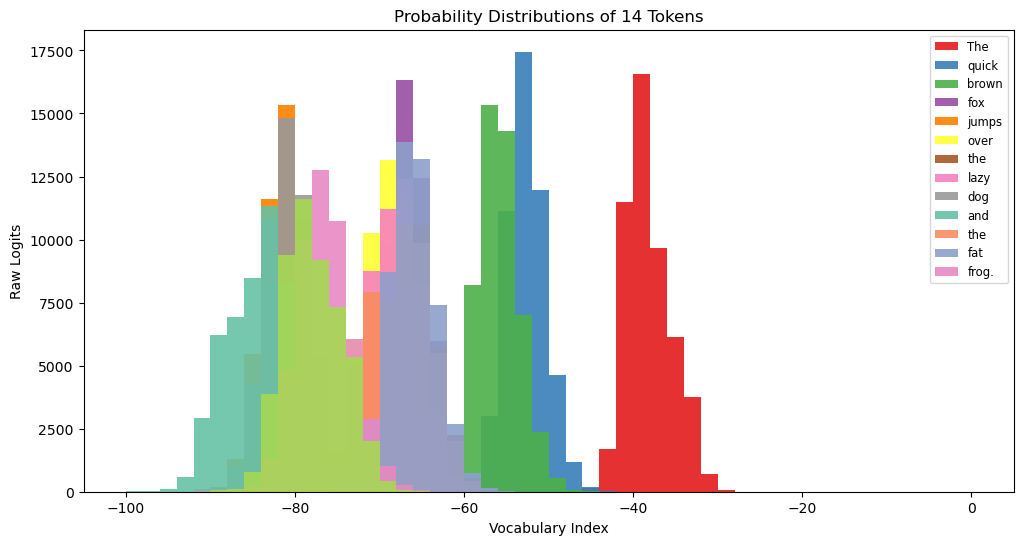

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot raw logit -- see if there's any clue before normalization
rawlogits = outputs.logits.squeeze(0).cpu().numpy()
#palette for plotting
palette = sns.color_palette("Set1") + sns.color_palette("Set2") + sns.color_palette("Set3")

# Generate logarithmic bins from 10^-6 to 0.1
bins = np.logspace(-16, -1, 50)  # 50 bins from 10^0 to 10^3

# Plot the distributions
plt.figure(figsize=(12, 6))
for i in range(rawlogits.shape[0]):
    plt.hist(rawlogits[i], label=f'Token {i+1}', bins= np.linspace(-100, 0, 51), color = palette[i], alpha=0.9)

plt.xlabel('Vocabulary Index')
plt.ylabel('Raw Logits')
plt.title('Probability Distributions of 14 Tokens')
plt.legend(loc='upper right', fontsize='small', labels = text.split())
plt.show()

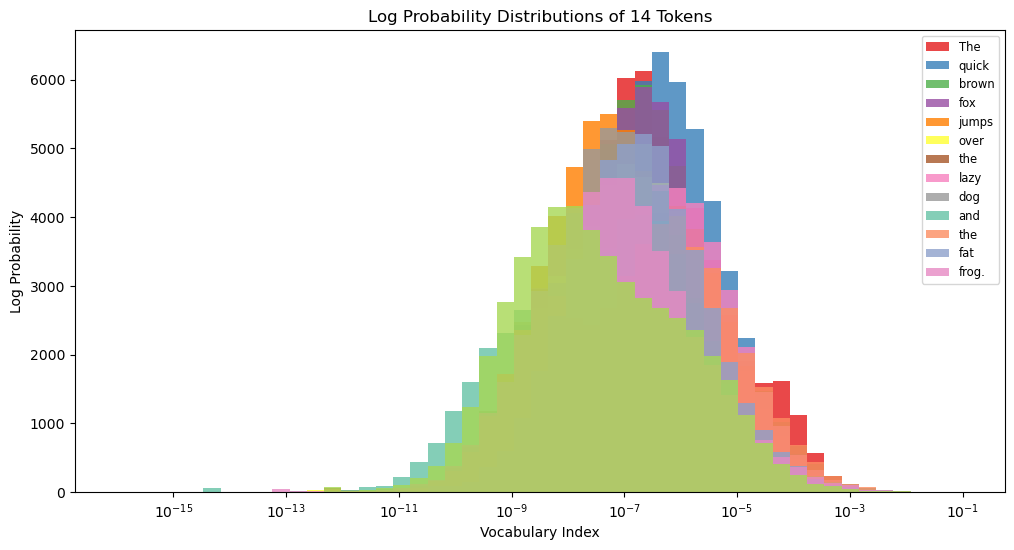

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Generate logarithmic bins from 10^-6 to 0.1
bins = np.logspace(-16, -1, 50)  # 50 bins from 10^0 to 10^3

# Plot the distributions
plt.figure(figsize=(12, 6))
for i in range(probabilities.shape[0]):
    plt.hist(probabilities[i], label=f'Token {i+1}', bins= bins, color = palette[i],alpha=0.8)

plt.xlabel('Vocabulary Index')
plt.ylabel('Log Probability')
plt.xscale('log')  # Set x-axis to log scale
plt.title('Log Probability Distributions of 14 Tokens')
plt.legend(loc='upper right', fontsize='small', labels = text.split())
plt.show()